## Least Squares Approximation

Sometimes we only have some approximate points, not the exact points. At that time, we need to find a curve which minimize the error. And that's when we need least squares fitting.

### Process:

By mapping $x_i$ to $X_i$, e.g. $x\to ln(x)$, we can write the model:

$$\hat{Y}=b_0+b_1X_1+...+b_pX_p$$

To minimize the $error=\sum_i(b_0+\sum_j b_jX_{ij}-Y_i)^2$:

$$\frac{\partial\sum_i e_i^2}{\partial b_k}$$

which can be written as matrix form and solved using Gaussian elimination.

Or we can solve the model directly using SVD.

#### Example:

Produce some data of function $f(x)=-sin(x)+e^x+0.1\epsilon$, with error $\epsilon$ being standard normal distribution. And fit the curve.

#### Code Example (Julia language):

Produce data:

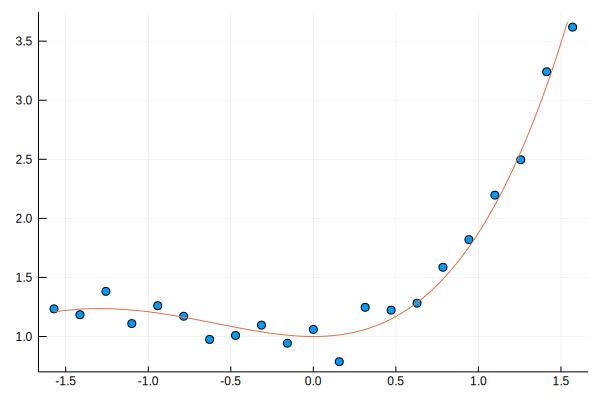

In [8]:
using Plots
using Random

rng = RandomDevice()

function func(x::Float64)
    return -sin(x)+exp(x)
end

x = (-π/2):(π/20):(π/2)
y = func.(x) .+ 0.1*randn(rng, Float64,21)
plot(x, y, t=:scatter, leg=false)

xStandard = (-π/2):(π/100):(π/2)
yStandard = func.(xStandard)
plot!(xStandard, yStandard)

Least squares using Gaussian elimination:

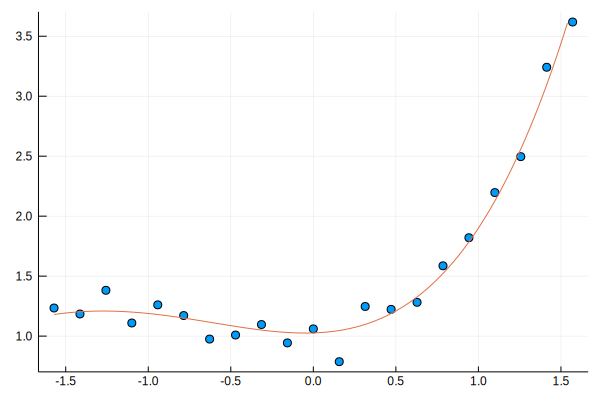

In [10]:
include("Elimination.jl")

# map x to Xᵢ
X = Array{Float64}(undef, 3, size(x)[1])
X .= 1.0
X[2, :] = -sin.(x)
X[3, :] = exp.(x)

# initialize matrix
matrixX = Array{Float64}(undef, 3, 3)
matrixY = Array{Float64}(undef, 3)
for i in 1:3
    for j in 1:3
        matrixX[i, j] = sum(X[i,:] .* X[j,:])
    end
    matrixY[i] = sum(y .* X[i,:])
end

# Gaussian elimination
GaussianElimination!(matrixX, matrixY)
coefficient = [matrixY[i]/matrixX[i, i] for i in 1:3]

# plot
plot(x, y, t=:scatter, leg=false)
yPredict = exp.(xStandard).*coefficient[3] .- sin.(xStandard).*coefficient[2] .+ coefficient[1]
plot!(xStandard, yPredict)

Least Squares using SVD: